In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Changepoint Quantification

An analysis of the change in trend before and after a change point has occurred within GDP per hour worked. Focussing on change points caused by the 2008 housing crisis. This will be done by looking specifically at the 2 years preceding and following the changepoint.

## All countries averaged

In [141]:
# Import Data
dataDirectory = "../Datasets/cleaned_Productivity.csv"
rawData = pd.read_csv(dataDirectory, header=0, nrows=None)
headers = list(rawData)
rawData = np.array(rawData)
countries = rawData[:,0]

In [142]:
# Trim to desired years
beginIndex = 6
endIndex = 11
rawData = rawData[:, beginIndex:endIndex]
headers = headers[beginIndex:endIndex]

Text(0.5, 0, 'Year')

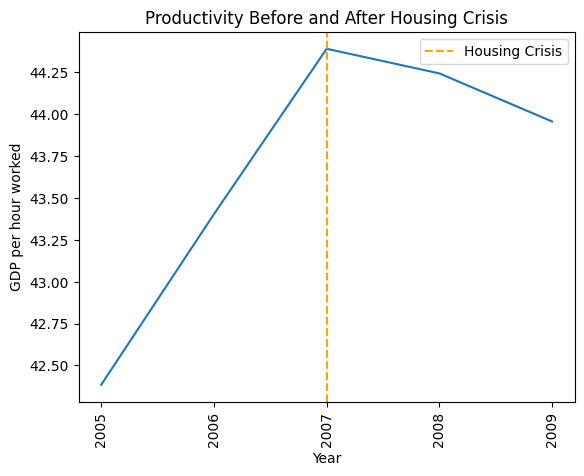

In [143]:
# Generate average productivity for each year
averageProd = np.mean(rawData, axis=0)
plt.plot(averageProd, label=None)
plt.xticks(ticks=np.arange(0, len(headers)), labels=headers, rotation=90)
plt.axvline(x=2, c='orange', linestyle='dashed', label="Housing Crisis")
plt.legend()
plt.title("Productivity Before and After Housing Crisis")
plt.ylabel("GDP per hour worked")
plt.xlabel("Year")

In [144]:
changes = np.diff(averageProd)
averageChangeBefore = np.mean(changes[:2])
averageChangeAfter = np.mean(changes[2:])
print(f'The average change before the crisis is {averageChangeBefore}.')
print(f'The average change after the crisis is {averageChangeAfter}.')

The average change before the crisis is 1.0025520697674501.
The average change after the crisis is -0.21698759302325143.


## Countries Individually

Text(0.5, 0, 'Year')

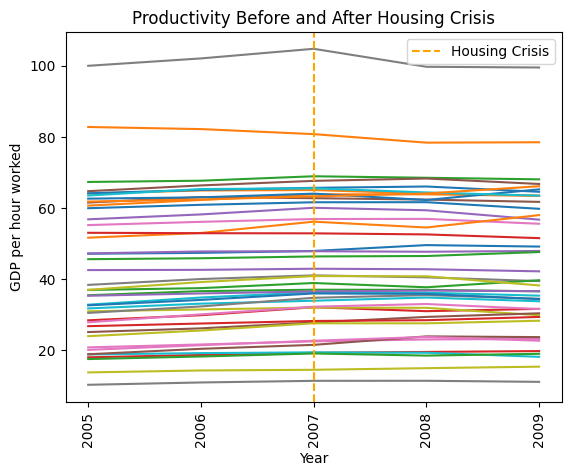

In [145]:
plt.plot(rawData.T, label=None)
plt.xticks(ticks=np.arange(0, len(headers)), labels=headers, rotation=90)
plt.axvline(x=2, c='orange', linestyle='dashed', label="Housing Crisis")
plt.legend()
plt.title("Productivity Before and After Housing Crisis")
plt.ylabel("GDP per hour worked")
plt.xlabel("Year")

In [146]:
changes = np.diff(rawData, axis=1)
averageChangeBefore = np.mean(changes[:, :2], axis=1)
averageChangeAfter = np.mean(changes[:, 2:], axis=1)
acceleration = averageChangeAfter - averageChangeBefore

/tmp/ipykernel_56646/3191178485.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries, rotation=90)


Text(0.5, 0, 'Country')

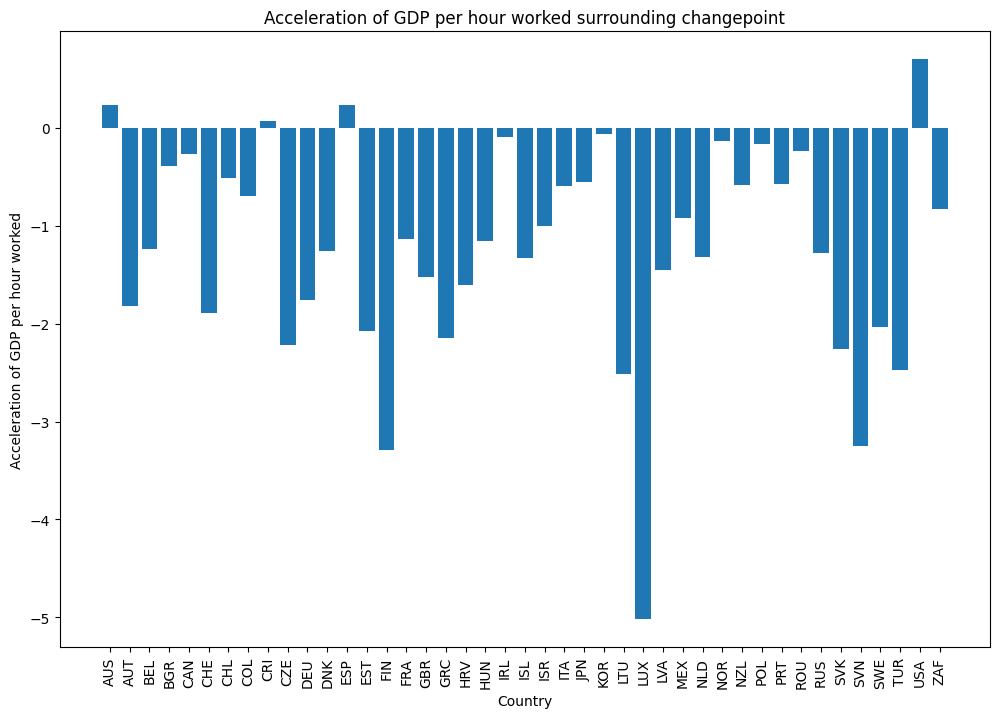

In [159]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(countries, acceleration)
ax.set_xticklabels(countries, rotation=90)
ax.set_title("Acceleration of GDP per hour worked surrounding changepoint")
ax.set_ylabel("Acceleration of GDP per hour worked")
ax.set_xlabel("Country")